<a href="https://colab.research.google.com/github/skshiraj/Data-Science--Cheat-Sheet/blob/master/EDA_on_Haberman_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the DataSet :

Title: Haberman's Survival Data

Attribute Information:

Age of patient at time of operation (numerical)

Patient's year of operation (year - 1900, numerical)

Number of positive axillary nodes detected (numerical)

Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

Missing Attribute Values: None

Data may be found in : http://mlr.cs.umass.edu/ml/machine-learning-databases/haberman/haberman.data or https://www.kaggle.com/gilsousa/habermans-survival-data-set

# 1. Loading the data from the Haberman.csv file

In [0]:
# importing the required python libraries
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')

uploaded= files.upload()




Saving haberman.csv to haberman (2).csv


In [0]:
df = pd.read_csv('haberman.csv')


# 2.Data Preparation

In [0]:

labels = ['age', 'operation_year', 'axil_nodes', 'survived_status']
df.head()

,age,operation_year,axil_nodes,survived_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


** Printing Shape of the dataset**

In [0]:
# (Q) how many data-points/instances and attributes?
df.shape

(306, 4)

** Printing the column names of the dataset**

In [0]:
df.columns

Index(['age', 'operation_year', 'axil_nodes', 'survived_status'], dtype='object')

**Describing the dataset in terms of count, mean, standard deviation min value,max value, 25% value, 50% value, 75% value for each feature(column) of the dataset**

In [0]:
df.describe()

,age,operation_year,axil_nodes,survived_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


** Describe the data type of each column and memory usage of the entire data**

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                306 non-null int64
operation_year     306 non-null int64
axil_nodes         306 non-null int64
survived_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


**No Missing value** were found in our dataset, but we need to label our class in readable format, as survived features say **1 means survived which can be decoded as 'survived**', and **2- not survived which can b labeled as 'dead'**

** Describe the survied status: survived as 1, dead as 2 of bottom 5 rows**

In [0]:
df['survived_status'] = df['survived_status'].map({1:'survived', 2:'dead'})
df.tail()

,age,operation_year,axil_nodes,survived_status
301,75,62,1,survived
302,76,67,0,survived
303,77,65,3,survived
304,78,65,1,dead
305,83,58,2,dead


# Describe the total count of records

In [0]:
# (Q) How many patient records of each survival status are present ?
df['survived_status'].value_counts()

survived    225
dead         81
Name: survived_status, dtype: int64

We can see our dataset is not balanced, as we can see that from total 306 people, 255 people suvived for 5 or more year and 81 of them died within 5 years. So 225:81 is not a balanced pair.

# (3.1) 2-D scatter Plot

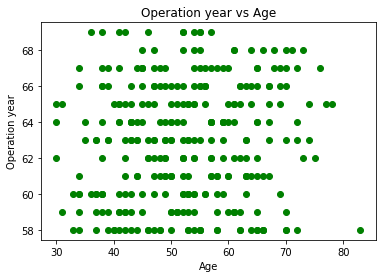

In [0]:
plt.scatter(df['age'],df['operation_year'], c = 'g')
plt.xlabel('Age')
plt.ylabel('Operation year')
plt.title('Operation year vs Age')
plt.show()

This scatter plot doesn't clear much about the dataset, it seems that dataset is highly mixed up, but still we can say that the majority of operations are performed on people age range between 40 and 68, where most of the points plotted.

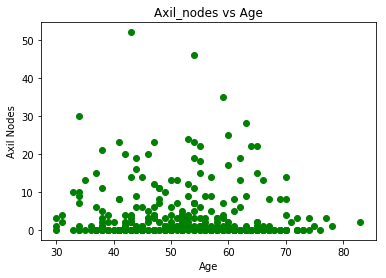

In [0]:
plt.scatter(df['age'],df['axil_nodes'], color = 'g')
plt.xlabel('Age')
plt.ylabel('Axil Nodes')
plt.title('Axil_nodes vs Age')
plt.show()

We can see that there is quite good concentration of data point When axil_node is 0

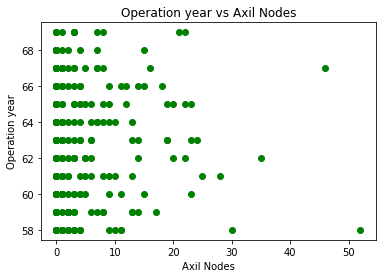

In [0]:
plt.scatter(df['axil_nodes'], df['operation_year'], c = 'g')
plt.xlabel('Axil Nodes')
plt.ylabel('Operation year')
plt.title('Operation year vs Axil Nodes')
plt.show()

Here we can conclude that large number of operation were done in span of 7 years between 1960 and 1966 

# (3.3) Pair-plot

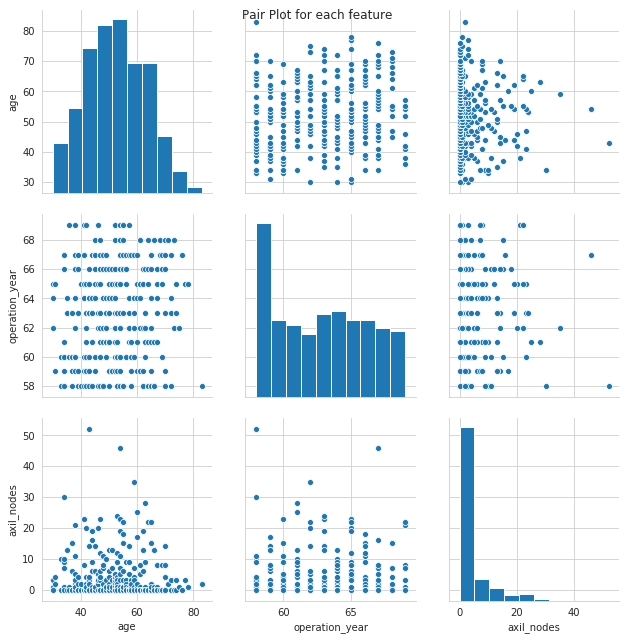

In [0]:
sns.set_style("whitegrid");
sns.pairplot(df, size = 3);
plt.suptitle('Pair Plot for each feature');
plt.show()



# (3.4) Histogram, PDF, CDF

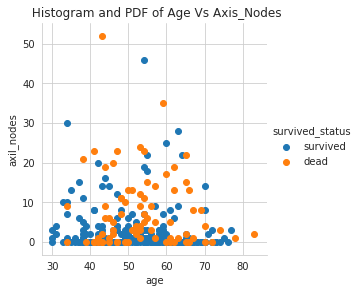

In [0]:
# Plotting the hisograms

# Histogram for Age and Axil Nodes
sns.set_style('whitegrid');
sns.FacetGrid(df, hue = 'survived_status', size = 4)\
   .map(plt.scatter, 'age', 'axil_nodes')\
   .add_legend();
plt.title(' Histogram and PDF of Age Vs Axis_Nodes')
plt.show();

1. Here with this scatter plot we get insight that patients with 0 axil nodes are more likely to survive irrespective to there age.

2. It is very much less likely to have patients with axil nodes more than 30.

3. Patients who are older than 50 and have axil nodes greater than 10 are more likely to die.


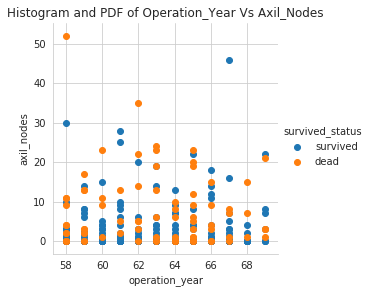

In [0]:
# Histogram for Operation Year and Axil Nodes
sns.set_style('whitegrid');
sns.FacetGrid(df, hue='survived_status', size = 4) \
    .map(plt.scatter, 'operation_year', 'axil_nodes') \
    .add_legend();
plt.title('Histogram and PDF of Operation_Year Vs Axil_Nodes')
plt.show()

This doesn't give much clear picture about the dataset, but we can say most of the operations which were done in year 1965 were unsuccessfull.

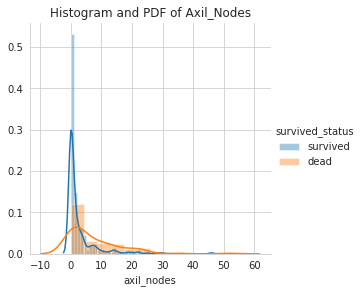

In [0]:
# Histogram for Axil Nodes
sns.FacetGrid(df, hue='survived_status', size = 4) \
    .map(sns.distplot, 'axil_nodes') \
    .add_legend();
plt.title('Histogram and PDF of Axil_Nodes')
plt.show();

We can conclude that from this histogram (axil_node) that, Patients having 0 axil nodes are more likely to survive 

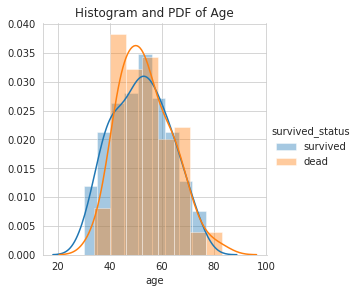

In [0]:
# Histogram for Age
sns.FacetGrid(df, hue='survived_status', size = 4) \
    .map(sns.distplot, 'age') \
    .add_legend();
plt.title('Histogram and PDF of Age')
plt.show();

1.This histogram is overlapping each other, but still we can say that people within range of 40-60 are more likely to die.

2.People less than age 40 are more likely to survive

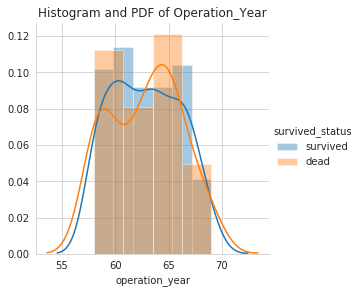

In [0]:
# Histogram for Operation Year 
sns.FacetGrid(df, hue='survived_status', size = 4) \
    .map(sns.distplot, 'operation_year') \
    .add_legend();
plt.title('Histogram and PDF of Operation_Year')
plt.show();

Large number of patients died whos operation was done in year 60 and 65

# CDF

[0.64379085 0.12745098 0.04575163 0.05228758 0.01960784 0.03921569
 0.00980392 0.01633987 0.02287582 0.00653595 0.00326797 0.00326797
 0.         0.00326797 0.         0.         0.         0.00326797
 0.         0.00326797]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


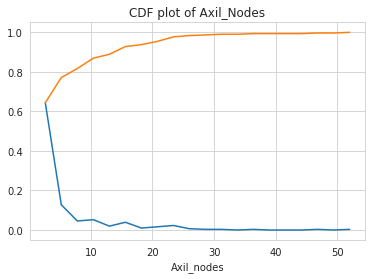

In [0]:
# Plots of CDF of Axil Nodes.
counts, bin_edges = np.histogram(df['axil_nodes'], bins=20, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Axil_nodes')
plt.title("CDF plot of Axil_Nodes")
plt.show()

# (3.5) Box-plot

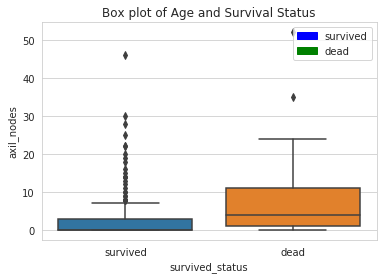

In [0]:
# Box plots for Axil_Nodes
sns.boxplot(x='survived_status', y = 'axil_nodes', data=df).set_title('Box plot of Age and Survival Status')
blue_patch = mpatches.Patch(color='blue', label='survived')
green_patch = mpatches.Patch(color='green', label='dead')
plt.legend(handles=[blue_patch,green_patch],loc=1)
plt.show()

1. Box plot shows that, the more number of axil nodes, the more patients likely to die

2. The patients who had axil nodes from 1 to 24 are the majority of patients who died.

# (3.6) Whiskers

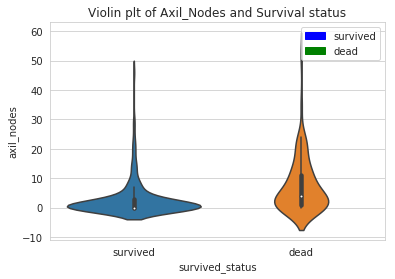

In [0]:
# Violin plots for Axil_Nodes
sns.violinplot(x='survived_status', y='axil_nodes', data = df, size = 6)
plt.title('Violin plt of Axil_Nodes and Survival status')
blue_patch = mpatches.Patch(color='blue', label='survived')
green_patch = mpatches.Patch(color='green', label='dead')
plt.legend(handles=[blue_patch,green_patch],loc=1)
plt.show()

1. After taking a look at violin plot we can see that, the large number of patients who survived had 0 axil nodes or doesn't had it at all.

2. Patients and who died had axil node greater than or equal to 1, and as the concentration of axil node increases the repective patient is more likely to die.